In [19]:
import pandas as pd

In [20]:
from sklearn import tree
from sklearn.model_selection import train_test_split, cross_val_score

In [21]:
%matplotlib inline
import seaborn as sns

In [22]:
train_data = pd.read_csv('dogs_n_cats.csv')
test_data = pd.read_json('dataset_209691_15.txt')

In [23]:
X = train_data.drop(['Вид'], axis=1)
y = train_data['Вид']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [25]:
max_depth_values = range(1, 100)

In [26]:
results = []

In [27]:
for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    mean_cross_val_score = cross_val_score(clf, X_train, y_train, cv=5).mean()
    results.append([max_depth, train_score, test_score, mean_cross_val_score])

In [28]:
scores = pd.DataFrame(results, columns=['max_depth', 'train_score', 'test_score', 'mean_cross_val_score'])

In [29]:
scores_long = pd.melt(
    scores,
    id_vars=['max_depth'],
    value_vars=['train_score', 'test_score', 'mean_cross_val_score'],
    var_name='set_type',
    value_name='score'
)

<AxesSubplot:xlabel='max_depth', ylabel='score'>

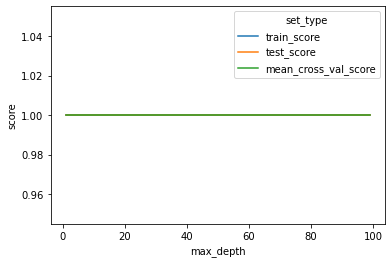

In [30]:
sns.lineplot(data=scores_long, x='max_depth', y='score', hue='set_type')

In [31]:
best_depth = 1

In [32]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=best_depth)

In [33]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=1)

In [37]:
data = pd.DataFrame(clf.predict(test_data), columns=['type'])

In [43]:
data.value_counts()

type   
котик      56
собачка    44
dtype: int64

[Text(0.5, 0.75, 'Длина <= 14.5\nentropy = 1.0\nsamples = 700\nvalue = [350, 350]\nclass = котик'),
 Text(0.25, 0.25, 'entropy = 0.0\nsamples = 350\nvalue = [350, 0]\nclass = котик'),
 Text(0.75, 0.25, 'entropy = 0.0\nsamples = 350\nvalue = [0, 350]\nclass = собачка')]

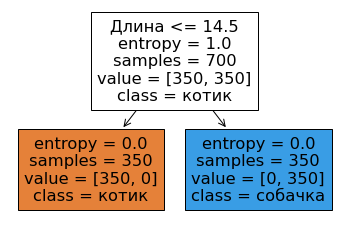

In [46]:
tree.plot_tree(
    clf,
    feature_names=list(X),
    class_names=['котик', 'собачка'],
    filled=True
)